# Setting path for data files

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/contradictory-my-dear-watson/sample_submission.csv
/kaggle/input/contradictory-my-dear-watson/train.csv
/kaggle/input/contradictory-my-dear-watson/test.csv


# Importing required libraries

In [ ]:
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

In [ ]:
import sklearn

#Loading Train Data

In [ ]:
train_df=pd.read_csv("../input/contradictory-my-dear-watson/train.csv")
print('Number of rows and columns in train set:', train_df.shape)
train_df.head(5)

Number of rows and columns in train set: (12120, 6)


,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [ ]:
# Checking the data types for each column
train_df.dtypes

id            object
premise       object
hypothesis    object
lang_abv      object
language      object
label          int64
dtype: object

In [ ]:
# Checking for null values
print(train_df.isnull().sum())

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64


# Loading Test Data

In [ ]:
test_df=pd.read_csv("../input/contradictory-my-dear-watson/test.csv")
print('Number of rows and columns in test set:', test_df.shape)
test_df.head(5)

Number of rows and columns in test set: (5195, 5)


,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [ ]:
# Checking for null values in test set
print(test_df.isnull().sum())

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
dtype: int64


# Loading sammple submission file

In [ ]:
sample_sub_df=pd.read_csv("../input/contradictory-my-dear-watson/sample_submission.csv")
print('Number of rows and columns in sample set:', sample_sub_df.shape)
sample_sub_df.head(5)

Number of rows and columns in sample set: (5195, 2)


,id,prediction
0,c6d58c3f69,1
1,cefcc82292,1
2,e98005252c,1
3,58518c10ba,1
4,c32b0d16df,1


# Filtering the columns needed for sentence -pair classifier model

In [ ]:
train_final = train_df.filter(['premise','hypothesis','label'], axis=1)
train_final.head(5)

,premise,hypothesis,label
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,0
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,2
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,0
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,0
4,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,1


# Renaming columns as needed by simpletransformer library

In [ ]:
train_final.rename(columns={"premise": "text_a", "hypothesis": "text_b","label":"labels"}, inplace=True)

In [ ]:
train_final.head(4)
#train_final.shape

,text_a,text_b,labels
0,and these comments were considered in formulat...,The rules developed in the interim were put to...,0
1,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,2
2,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,0
3,you know they can't really defend themselves l...,They can't defend themselves because of their ...,0


# Splitting train data in train set and validation set

In [ ]:
from sklearn.model_selection import train_test_split


train_set, val_set = train_test_split(train_final, test_size=0.2,  random_state=143,stratify=train_final['labels'] )

In [ ]:
print("The size of train set is ", train_set.shape)
print("The size of validation set is", val_set.shape)
#print("The size of test set is", test_set.shape)

The size of train set is  (9696, 3)
The size of validation set is (2424, 3)


In [ ]:
train_set.head(2)

,text_a,text_b,labels
12059,"Bao gồm các yếu tố như khung thời gian ngắn, v...",Họ đã xóa các tệp máy tính khỏi IBM.,1
10893,"He was a pilot, not a platoon leader.","He was no platoon leader, but a lowly pilot.",0


In [ ]:
val_set.head(2)

,text_a,text_b,labels
7886,Welts grew on each of the man's cheeks.,The welts on the man's cheeks were shrinking.,2
2900,For more than 26 centuries it has witnessed co...,Modernity has made no progress in the historic...,1


# Filtering required column in final test set and renaming columns as required by simpletransformer libary

In [ ]:
final_test_df = test_df[["premise", "hypothesis"]]
final_test_df.columns = ["text_a", "text_b"]

In [ ]:
print("Final Test Shape:,",final_test_df.shape)
print("Final Test dataframe:,",final_test_df.head(5))

Final Test Shape:, (5195, 2)
Final Test dataframe:,                                               text_a  \
0  بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...   
1                             هذا هو ما تم نصحنا به.   
2  et cela est en grande partie dû au fait que le...   
3                   与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp   
4                              Она все еще была там.   

                                              text_b  
0  کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...  
1  عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...  
2                             Les mères se droguent.  
3                            IMA与其他组织合作，因为它们都依靠共享资金。  
4     Мы думали, что она ушла, однако, она осталась.  


In [ ]:
import gc
import torch

In [ ]:
gc.collect()
torch.cuda.empty_cache()

# Installing simpletransformer library

In [ ]:
# !pip install --upgrade transformers
!pip install git+git://github.com/AndLen/simpletransformers.git --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.8.3 requires cupy-cuda114, which is not installed.
distributed 2021.7.1 requires dask==2021.07.1, but you have dask 2021.10.0 which is incompatible.
dask-cudf 21.8.3 requires dask<=2021.07.1,>=2021.6.0, but you have dask 2021.10.0 which is incompatible.
dask-cudf 21.8.3 requires pandas<1.3.0dev0,>=1.0, but you have pandas 1.3.4 which is incompatible.
allennlp 2.7.0 requires transformers<4.10,>=4.1, but you have transformers 4.12.5 which is incompatible.


In [ ]:
# !pip install simpletransformers

In [ ]:
from simpletransformers.classification import (ClassificationModel, ClassificationArgs)

In [ ]:
RANDOM_STATE = 42

# Setting hyperparameters for training the model

In [ ]:
# Create a ClassificationModel

model_args = ClassificationArgs(num_train_epochs=2, 
                                overwrite_output_dir=True)
model_args.manual_seed = RANDOM_STATE

model_args.train_batch_size = 16
model_args.eval_batch_size = 16

model_args.learning_rate = 4e-6



In [ ]:
model = ClassificationModel(model_type='xlmroberta', 
                            model_name='joeddav/xlm-roberta-large-xnli', 
                            args = model_args, 
                            num_labels = 3,
                           use_cuda = True)

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.09G [00:00<?, ?B/s]

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:460: UserWarning: use_multiprocessing automatically disabled as xlmroberta fails when using multiprocessing for feature conversion.
  f"use_multiprocessing automatically disabled as {model_type}"


# Training the network

In [ ]:
model.train_model(train_set, eval_df=val_set)
                  #eval_df=eval_df)

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/606 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:922: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm
/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarnin

Running Epoch 1 of 2:   0%|          | 0/606 [00:00<?, ?it/s]

(1212, 0.43475202466714696)

# Evaluating the network

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(val_set, 
                                                            acc=sklearn.metrics.accuracy_score)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/2424 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/152 [00:00<?, ?it/s]

Evaluation Results

In [ ]:
result

{'mcc': 0.8911343212967531,
 'acc': 0.9273927392739274,
 'eval_loss': 0.3072476222326881}

# Predicting the labels for final test set

In [ ]:
final_pred_texts = []
for row in final_test_df.itertuples(index = False):
    final_pred_texts.append(list(row))

In [ ]:
predictions, raw_outputs = model.predict(final_pred_texts)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/5195 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

In [ ]:
model_preds = pd.DataFrame(test_df["id"])
model_preds["prediction"] = predictions

# Saving the predictions in submission.csv file

In [ ]:
model_preds.to_csv("submission.csv", index=False)

# This file was run on Kaggle using Kaggle GPU and the results were submitted on leaderboard and the Accuracy is 0.92666 on leaderboard

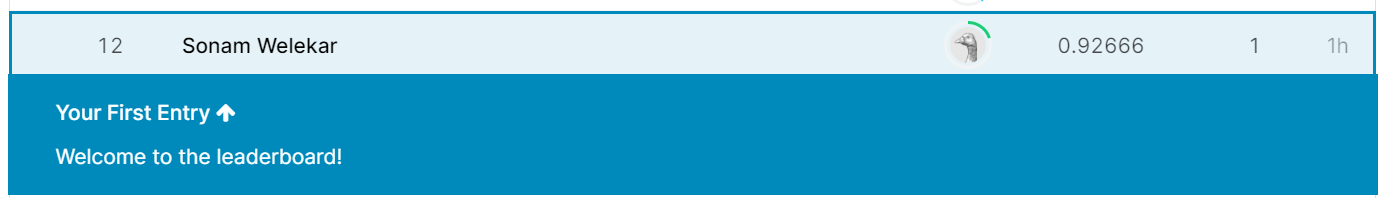